In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import glob
%matplotlib inline

In [60]:
from pathlib import Path
path = "/content/drive/MyDrive/dataSet"
 
# to store files in a list
list = []
 
# dirs=directories
for (root, dirs, file) in os.walk(path):
    for f in file:
        if '.jpg' in f:
          fpath = Path(f).absolute()
          print(fpath)

/content/DSC_0658 A.jpg
/content/DSC_0660 A.jpg
/content/DSC_0661 A.jpg
/content/DSC_0662 A.jpg
/content/DSC_0663 A.jpg
/content/DSC_0667 A.jpg
/content/DSC_0669 A.jpg
/content/DSC_0671 A.jpg
/content/DSC_0673 A.jpg
/content/DSC_0676 A.jpg
/content/DSC_0677 A.jpg
/content/DSC_0678 A.jpg
/content/DSC_0679 A.jpg
/content/DSC_0680 A.jpg
/content/DSC_0682 A.jpg
/content/DSC_0685 A.jpg
/content/DSC_0684 A.jpg
/content/DSC_0665 A.jpg
/content/DSC_0865 A.jpg
/content/DSC_0866 A.jpg
/content/DSC_0867 A.jpg
/content/DSC_0868 A.jpg
/content/DSC_0871 A.jpg
/content/DSC_0872 A.jpg
/content/DSC_0874 A.jpg
/content/DSC_0875 A.jpg
/content/DSC_0877 A.jpg
/content/DSC_0720 A.jpg
/content/DSC_0718 A.jpg
/content/DSC_1014 A.jpg
/content/DSC_1015 A.jpg
/content/DSC_1017 A.jpg
/content/DSC_1018 A.jpg
/content/DSC_1020 A.jpg
/content/DSC_1022 A.jpg
/content/DSC_0657 A.jpg
/content/DSC_0683 A.jpg
/content/IMG_20190309_184539830 A.jpg
/content/IMG_20190312_175603976 A.jpg
/content/DSC_1084 A-.jpg
/content/DS

The type of this input is <class 'numpy.ndarray'>
Shape: (3328, 5568, 3)


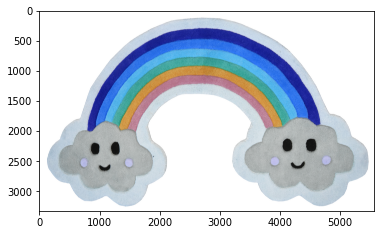

In [64]:
#take example of first address image
image_address='/content/drive/MyDrive/dataSet/kids carpet/DSC_0657 A.jpg'
image = cv2.imread(image_address)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

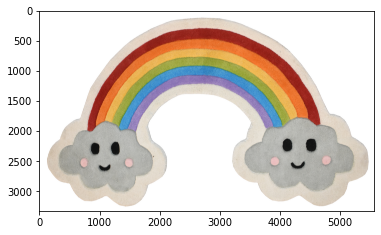

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

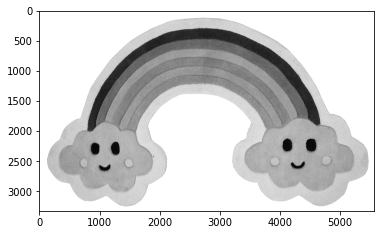

In [6]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

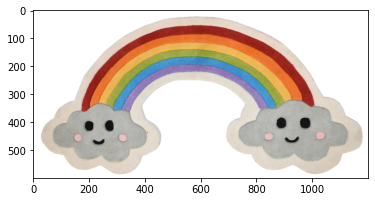

In [7]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [8]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [9]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [22]:

def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([254.94014171, 254.92926452, 254.91671523]),
 array([153.93251616, 161.69261853,  68.08795797]),
 array([166.42073056, 164.74816419, 158.62860102]),
 array([226.54359543, 216.16111769, 203.21512939]),
 array([152.01103956,  40.00597976,  30.27534499]),
 array([233.7918552 , 179.65062389,  85.13464966]),
 array([ 68.16134428, 145.02995742, 199.27083333]),
 array([231.57590939, 115.00522762,  47.58059246]),
 array([180.90138987, 180.59764251, 175.23574947]),
 array([25.32640587, 26.05256724, 25.40525672]),
 array([143.35586664, 125.00773623, 180.57874378]),
 array([215.09730561, 202.02628496, 188.63003368])]

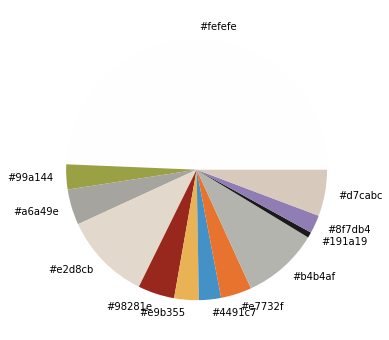

In [27]:
get_colors(get_image(image_address), 12, True)